"This notebook explores the `emails.csv` dataset, visualizes class distribution, and evaluates the SVM model's performance."

Dataset loaded successfully!


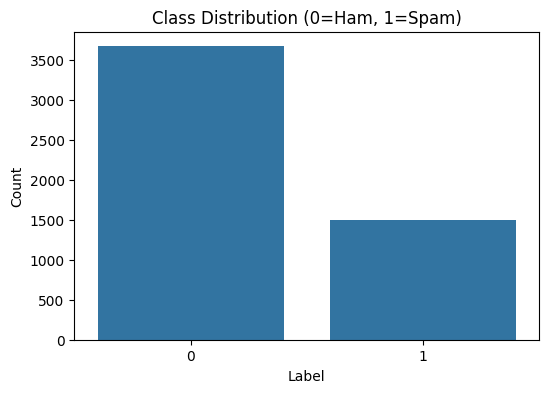

Best parameters: {'C': 0.1}

Model Performance:
Accuracy: 0.9643
Precision: 0.9218
Recall: 0.9561
F1-Score: 0.9386

Confusion Matrix:
[[715  24]
 [ 13 283]]


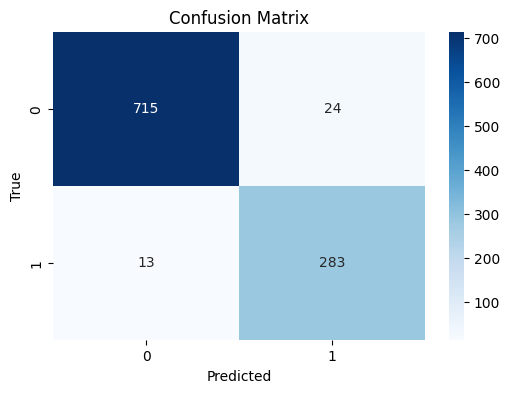

In [4]:
import sys
import os
# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from src.data_preprocessing import load_dataset, preprocess_data
from src.model_training import train_svm

# Ensure processed directory exists
os.makedirs(os.path.join(project_root, 'data', 'processed'), exist_ok=True)

# Load dataset
data_path = os.path.join(project_root, 'data', 'raw', 'emails.csv')
data = load_dataset(data_path)

# Preprocess data
X, y = preprocess_data(data)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution (0=Ham, 1=Spam)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.savefig(os.path.join(project_root, 'data', 'processed', 'class_distribution.png'))
plt.show()

# Train model and get test set predictions
model, X_test, y_test = train_svm(X, y)

# Plot confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(os.path.join(project_root, 'data', 'processed', 'confusion_matrix.png'))
plt.show()